# Пример классификации на 3 типа

In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [2]:
iris = datasets.load_iris()

In [3]:
type( iris )

sklearn.utils.Bunch

In [4]:
for key in iris.keys():
    print( key )

data
target
target_names
DESCR
feature_names
filename


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

sepal - чашелистик

petal - лепесток

In [15]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
iris.data.shape

(150, 4)

In [8]:
X = iris.data[:, :2 ]
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [9]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
len( Y )

150

In [11]:
model = LogisticRegression()

In [12]:
model.fit( X, Y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Пример отсюда 

http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [13]:
import numpy as np
import matplotlib.pyplot as plt

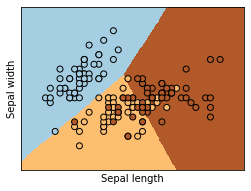

In [14]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
# X

In [20]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [23]:
model.predict([[1.5, 2.0]])

array([0])

In [25]:
np.round(model.predict_proba(X), 2)

array([[0.92, 0.06, 0.02],
       [0.79, 0.18, 0.03],
       [0.94, 0.05, 0.01],
       [0.94, 0.05, 0.01],
       [0.96, 0.03, 0.01],
       [0.94, 0.03, 0.02],
       [0.98, 0.02, 0.  ],
       [0.92, 0.06, 0.02],
       [0.94, 0.06, 0.  ],
       [0.85, 0.13, 0.02],
       [0.89, 0.07, 0.04],
       [0.96, 0.03, 0.01],
       [0.84, 0.14, 0.02],
       [0.97, 0.03, 0.  ],
       [0.82, 0.08, 0.1 ],
       [0.97, 0.01, 0.02],
       [0.94, 0.03, 0.02],
       [0.92, 0.06, 0.02],
       [0.78, 0.11, 0.11],
       [0.97, 0.02, 0.01],
       [0.73, 0.19, 0.08],
       [0.96, 0.03, 0.01],
       [0.99, 0.01, 0.  ],
       [0.85, 0.12, 0.03],
       [0.96, 0.03, 0.01],
       [0.73, 0.23, 0.04],
       [0.92, 0.06, 0.02],
       [0.89, 0.08, 0.03],
       [0.85, 0.11, 0.04],
       [0.94, 0.05, 0.01],
       [0.89, 0.1 , 0.01],
       [0.73, 0.19, 0.08],
       [0.99, 0.01, 0.  ],
       [0.97, 0.02, 0.02],
       [0.85, 0.13, 0.02],
       [0.85, 0.12, 0.03],
       [0.73, 0.17, 0.1 ],
 

In [22]:
model.score(X, Y)

0.82